In [1]:
# DATA: The impact of holidays on the number of births in the USA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Link do pliku
url = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, "pl_PL")

births = df

quartiles = np.percentile(births['births'], [25,50,75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000* births.year + 100 * births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]

/var/folders/04/scdglzf94ggbmrs_4nhnb7zw0000gn/T/ipykernel_99931/682390955.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


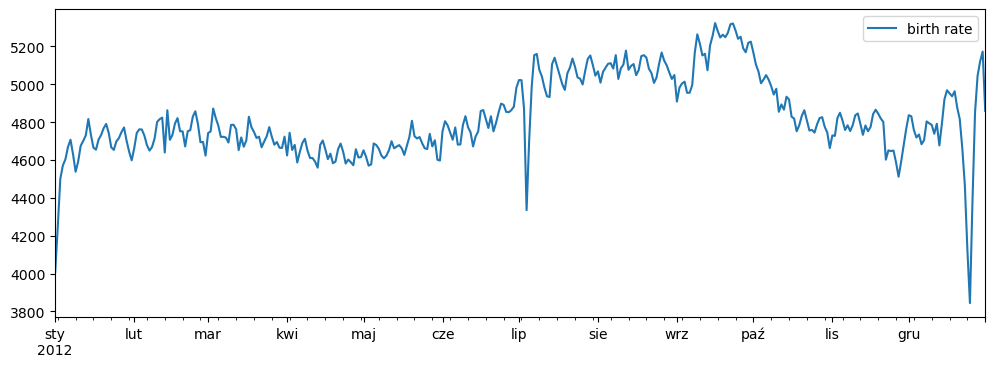

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
ax.legend(['birth rate']);

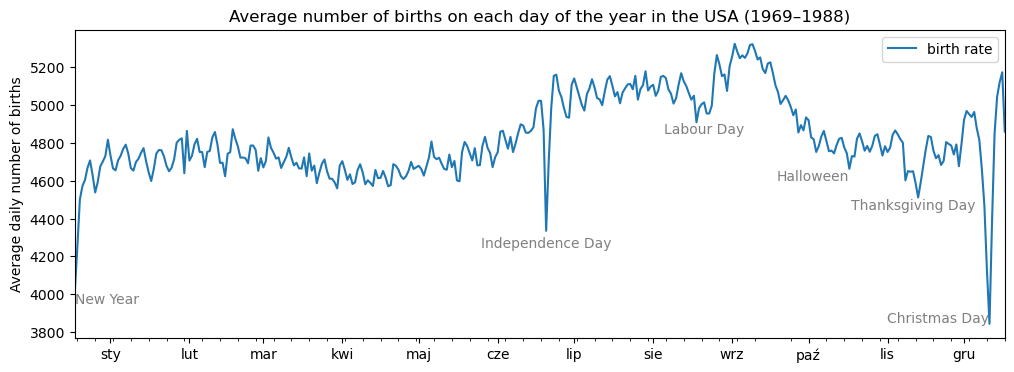

In [6]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

# adding texts
ax.text('2012-1-1', 3950, "New Year", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labour Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving Day", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas Day", ha='right', **style)

# adding axes text
ax.set(title='Average number of births on each day of the year in the USA (1969–1988)',
       ylabel='Average daily number of births')
ax.legend(['birth rate']);

# axis formatting (centered text for months)
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h'));